# <span style="color:blue"> NSL Exercise lesson 1. </span> 
 
## <span style="color:red"> Exercise 1. </span>
 
### 1.1.1 & 1.1.2
 
It is requested to make an estimation of 

$$\langle r \rangle = \int_0^1 r dr = 1/2$$ 

and its standard deviation 

$$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$$ 

as functions of the number of throws in each block. At the same time, it is requested to make an estimation of the uncertainty of both $\langle r \rangle$ and $\sigma^2$. All the integrations are carried out using Montecarlo methods.

The following script makes use of python libraries to load data from a file produced by the attached C++ code. The integration is carried on choosing  $M=10^5$ and $N=100$.

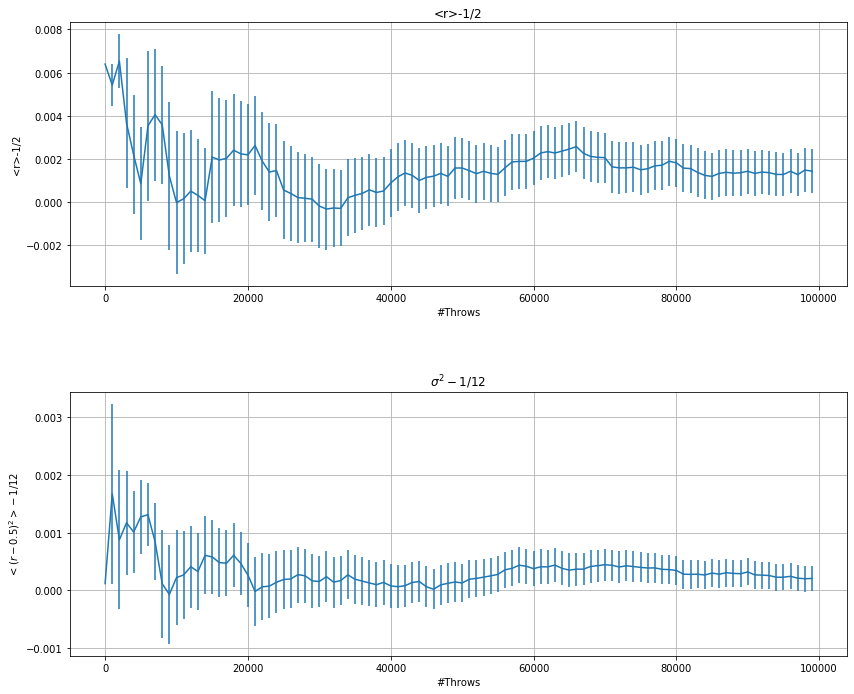

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, sum, err, sumv, errv=np.loadtxt("data1.dat", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')

f,ax=plt.subplots(2)

ax[0].errorbar(x, sum, yerr=err)
ax[0].set_title("<r>-1/2")
ax[0].set(xlabel="#Throws", ylabel="<r>-1/2")
ax[0].grid(True)

ax[1].errorbar(x, sumv, yerr=errv)
ax[1].set_title('$ \sigma^2-1/12 $')
ax[1].set(xlabel="#Throws", ylabel="$ <(r-0.5)^2>-1/12 $")
ax[1].grid(True)

plt.subplots_adjust(left=-0.5, bottom=-0.5, right=1.3, top=1.7, wspace=0.1, hspace=0.4)

plt.show()      

As expected, the mean value $\langle r \rangle-\frac{1}{2}$ and the standard deviation $\sigma^2-\frac{1}{12}$ tend to zero as the number of throws in each experiment increases. Therefore, we should expect that as #Throws tends to $\infty$, both values tend to zero.

### 1.1.3

We want to carry out Pearson's cumulative test. We divide the $[0,1]$ interval into $M$ identical sub-intervals, then for each sub-interval we calculate the $\chi^2$ as 

$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$ 

where $\frac{n}{M}$ represents the expected value, while we use the first $10^4$ pseudo-random numbers as $n_i$. 

The following script loads data from file data1.dat.

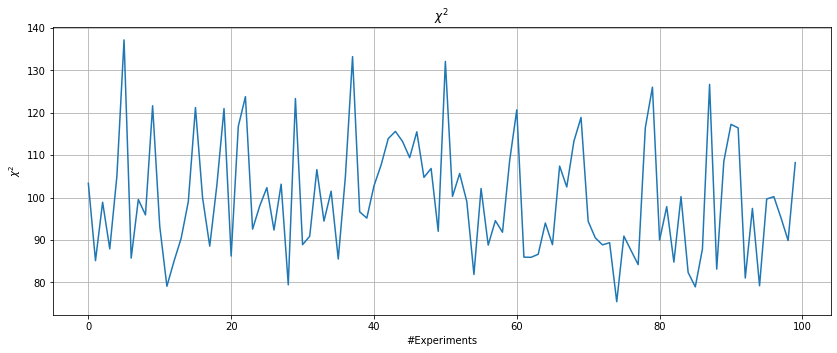

In [2]:
j=np.arange(0, 100, 1)
chij=np.loadtxt("data1.dat", usecols=(5), delimiter=' ', unpack='true')

plt.plot(j,chij)
plt.xlabel('#Experiments')
plt.ylabel('$ \chi^2 $')
plt.title('$ \chi^2 $')
plt.grid(True)

plt.subplots_adjust(left=0, bottom=0, right=1.8, top=1., wspace=0.1, hspace=0.4)

plt.show()  

As expected, since the value of $n_i$ is small, on average $\chi^2$ tends to 100, i.e. the number of sub-intervals.

## <span style="color:red"> Exercise 1.2 </span>

The exercise require to make four histograms for each given probability distribution (uniform, exponential, Cauchy-Lorentz), each time summing 1, 2, 10 and 100 random numbers ($S_N = \frac{1}{N}\sum_{i=1}^N x_i$). We choose $\lambda=1$ for the exponential distribution and $\mu=0$ , $\Gamma=1$, for the Lorentzian one.

The following script uses data produced by the same C++ code as above to make all the 12 histograms.

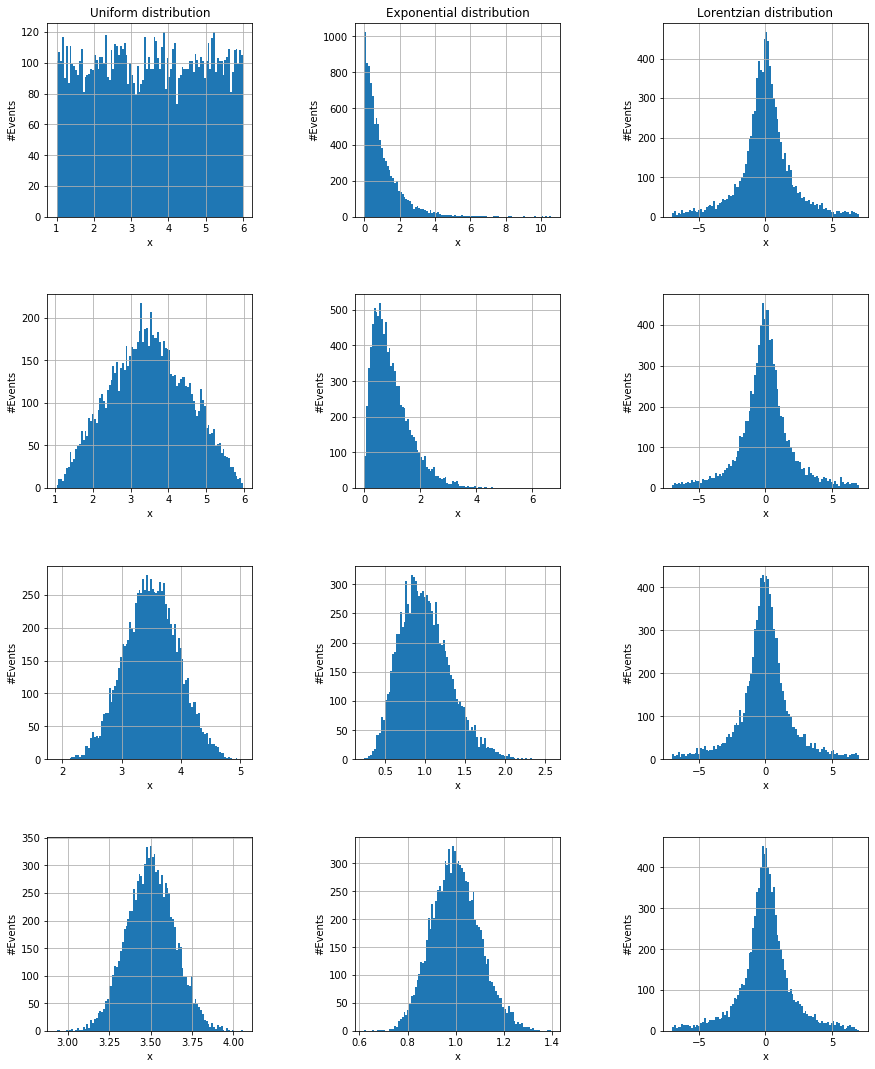

In [3]:
n_bins=100                #Note: it may take a while to make all the histograms
k=0  

f, ax=plt.subplots(4,3)

for i in range(3):
    for j in range(4):
        load=np.loadtxt("data2.dat", usecols=(k), delimiter=' ', unpack='true')
        if(i==2):
            ax[j,i].hist(load, n_bins, range=(-7,7))
        else:
            ax[j,i].hist(load, n_bins)
        ax[j,i].set(xlabel="x", ylabel="#Events")
        ax[j,i].grid(True)
        
        k+=1 
    
ax[0,0].set_title("Uniform distribution")
ax[0,1].set_title("Exponential distribution")
ax[0,2].set_title("Lorentzian distribution")

plt.subplots_adjust(left=0.3, bottom=-0.5, right=2.2, top=3, wspace=0.5, hspace=0.4)

plt.show()   

It is possible to see that uniform and exponential distribution for $N=100$ can represent a gaussian distribution quite well. On the other hand, you can use the following script to demonstrate that the same beahviour isn't true for the lorentzian distribution.


 Optimal parameters [Γ, μ]:  0.9953548261743922 0.01172752810245244


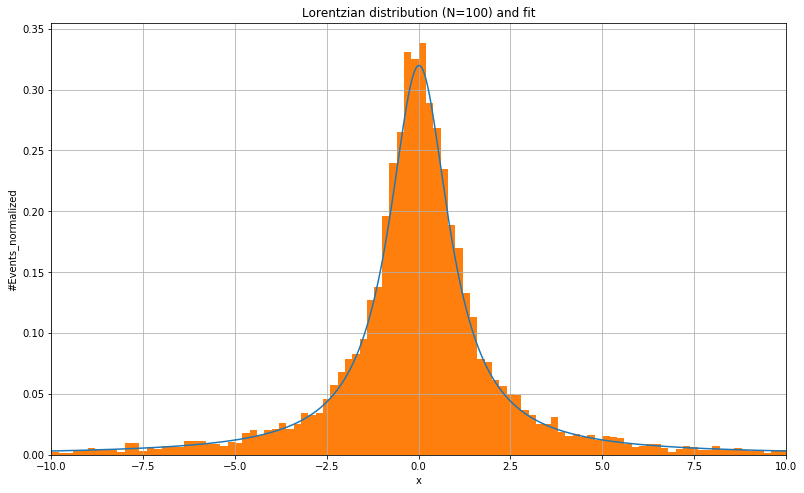

In [4]:
import scipy.stats as ss

l=np.loadtxt("data2.dat", usecols=11, delimiter=' ', unpack='true')

P=ss.cauchy.fit(l)                                             #You can try to change 'cauchy' to 'norm' but the 
x=np.linspace(plt.xlim(-10,10)[0],plt.xlim(-10,10)[1],len(l))  #script is no longer able to find optimal parameters
y=ss.cauchy.pdf(x,P[0],P[1])

print("\n Optimal parameters [\u0393, \u03BC]: ", P[1],P[0])

plt.plot(x,y)
plt.hist(l,n_bins,density=True,range=(-10,10))

plt.xlabel('x')
plt.ylabel('#Events_normalized')
plt.title("Lorentzian distribution (N=100) and fit")
plt.grid(True)

plt.subplots_adjust(left=-0.5, bottom=-0.5, right=1.2, top=1., wspace=0.5, hspace=0.4)

plt.show()

## <span style="color:red"> Exercise 1.3 </span>

We want to exploit Comte de Buffon's experiment to determine $\pi$ as follows. A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines at a distance $d$ apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. Therefore, an extimation of $\pi$ can be obtained from how many times the needle has been thrown: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we calculate $\pi$ as 

$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$ 

Obviously, the problem becomes equal to an integral estimation carried on with Montecarlo 'Hit or Miss' method. Also, in order to avoid using $\pi$ to make an extimation of $\pi$ itself, the attached C++ code makes use of a Montecarlo "Accept-Reject" method to generate random angles in the interval $[0,\pi]$.

The following script loads data obtained choosing $L=10$ and $d=30$.

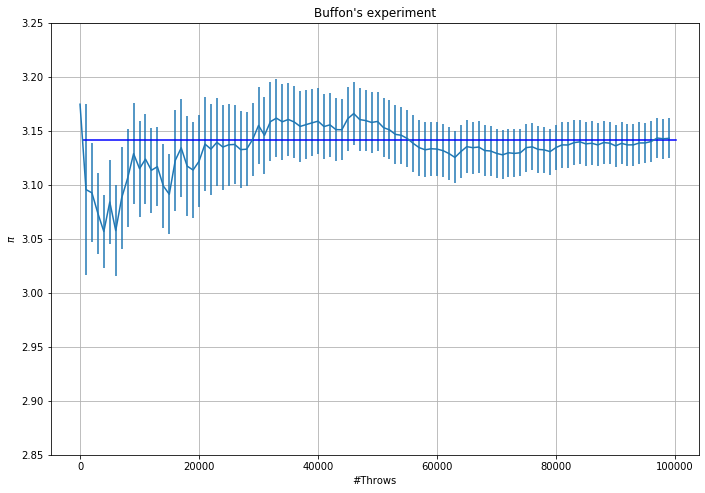

In [5]:
from math import pi

x, pi, pi_err=np.loadtxt("data3.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.errorbar(x,pi,pi_err)
plt.axhline(y=3.1415, xmin=0.05, xmax=0.965,color='b',linestyle='-')

plt.xlabel('#Throws')
plt.ylabel('$ \pi $')
plt.title("Buffon's experiment")
plt.grid(True)
plt.ylim([2.85,3.25])
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1.5, wspace=0.1, hspace=0.)

plt.show()   

As you can see in the plot above, as the number of throws increases the simulation tends to $\pi$ better and better.